https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
https://discuss.analyticsvidhya.com/t/labelencoder-how-to-reverse-it/11497

casuisticas
http://www.dgt.es/es/prensa/notas-de-prensa/2014/20140103-balance-2013-seguridad-vial-2013.shtml

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from pract2_utils import *

In [2]:
data = pd.read_csv("../datasets/accidentes_2013.csv", na_values=["?"])
data.shape

(89519, 32)

In [3]:
data.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,PLENO DÍA,LLOVIZNANDO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,NaN,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,NaN,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),NaN,NaN


In [4]:
cols = data.columns.tolist()
print(cols)

['MES', 'HORA', 'DIASEMANA', 'PROVINCIA', 'COMUNIDAD_AUTONOMA', 'ISLA', 'TOT_VICTIMAS', 'TOT_VICTIMAS30D', 'TOT_MUERTOS', 'TOT_MUERTOS30D', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_GRAVES30D', 'TOT_HERIDOS_LEVES', 'TOT_HERIDOS_LEVES30D', 'TOT_VEHICULOS_IMPLICADOS', 'ZONA', 'ZONA_AGRUPADA', 'RED_CARRETERA', 'TIPO_VIA', 'TRAZADO_NO_INTERSEC', 'TIPO_INTERSEC', 'ACOND_CALZADA', 'PRIORIDAD', 'SUPERFICIE_CALZADA', 'LUMINOSIDAD', 'FACTORES_ATMOSFERICOS', 'VISIBILIDAD_RESTRINGIDA', 'OTRA_CIRCUNSTANCIA', 'ACERAS', 'TIPO_ACCIDENTE', 'DENSIDAD_CIRCULACION', 'MEDIDAS_ESPECIALES']


In [5]:
cols = data.columns.tolist()
for i in cols:
    print(i)
    print(data[i].unique())

MES
[ 8  6 11  1 10  4  5  9  3 12  2  7]
HORA
[14.         18.         17.         ...  5.3        15.7
 19.18333333]
DIASEMANA
[3 6 2 7 4 1 5]
PROVINCIA
['Bizkaia' 'Tarragona' 'Lleida' 'Barcelona' 'Girona' 'Gipuzkoa'
 'Araba/Álava' 'Albacete' 'Alicante/Alacant' 'Almería' 'Ávila' 'Badajoz'
 'Balears, Illes' 'Burgos' 'Cáceres' 'Cádiz' 'Castellón/Castelló'
 'Ciudad Real' 'Córdoba' 'Coruña, A' 'Cuenca' 'Granada' 'Guadalajara'
 'Huelva' 'Huesca' 'Jaén' 'León' 'Rioja, La' 'Lugo' 'Madrid' 'Málaga'
 'Murcia' 'Navarra' 'Ourense' 'Asturias' 'Palencia' 'Palmas, Las'
 'Pontevedra' 'Salamanca' 'S.C.Tenerife' 'Cantabria' 'Segovia' 'Sevilla'
 'Soria' 'Teruel' 'Toledo' 'Valencia/València' 'Valladolid' 'Zamora'
 'Zaragoza' 'Ceuta' 'Melilla']
COMUNIDAD_AUTONOMA
['País Vasco' 'Cataluña' 'Castilla-La Mancha' 'Comunitat Valenciana'
 'Andalucía' 'Castilla y León' 'Extremadura' 'Balears, Illes' 'Galicia'
 'Aragón' 'Rioja, La' 'Madrid, Comunidad de' 'Murcia, Región de'
 'Navarra, Comunidad Foral de' 'Asturi

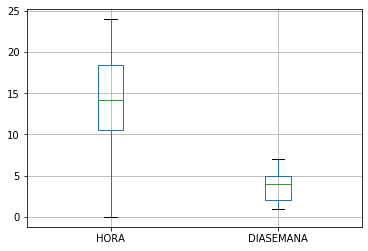

In [6]:
boxplot = data.boxplot(column=['HORA', 'DIASEMANA'])

In [7]:
#case1 = data[(data.COMUNIDAD_AUTONOMA=='Andalucía') & (data.HORA>=11) & (data.HORA<=18)]
case1 = data[(data.COMUNIDAD_AUTONOMA=='Andalucía') & (data.TIPO_INTERSEC=='ENLACE DE SALIDA')]
case1

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
13555,8,11.500000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SOLO MARCAS VIALES,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),FLUIDA,NINGUNA MEDIDA
13585,11,14.916667,1,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SOLO MARCAS VIALES,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Salida de la vía por la izquierda con colisión...,FLUIDA,NINGUNA MEDIDA
13621,12,6.000000,6,Almería,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Salida de la vía por la derecha sin colisión (...,FLUIDA,NINGUNA MEDIDA
13702,12,11.250000,2,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SOLO MARCAS VIALES,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),FLUIDA,NINGUNA MEDIDA
13852,6,12.000000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SEÑAL DE CEDA EL PASO,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),FLUIDA,NINGUNA MEDIDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78700,6,14.666667,2,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SOLO MARCAS VIALES,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Lateral),FLUIDA,NINGUNA MEDIDA
78709,1,12.000000,1,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,SEMÁFORO,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Otro tipo de accidente,FLUIDA,NINGUNA MEDIDA
78811,3,15.166667,5,Sevilla,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,SOLO MARCAS VIALES,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),FLUIDA,NINGUNA MEDIDA
78819,12,9.750000,4,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,NO HAY ACERA,Salida de la vía por la izquierda con colisión...,FLUIDA,NINGUNA MEDIDA


In [8]:
# One Hot Encoding 
df = pd.get_dummies(case1, prefix=['lum','dens'], columns=['LUMINOSIDAD','DENSIDAD_CIRCULACION'])
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(case1.LUMINOSIDAD.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["Lum_"+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df, dfOneHot], axis=1)
dfh

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,lum_NOCHE: SIN ILUMINACIÓN,lum_PLENO DÍA,dens_CONGESTIONADA,dens_DENSA,dens_FLUIDA,Lum_CREPÚSCULO,Lum_NOCHE: ILUMINACIÓN INSUFICIENTE,Lum_NOCHE: ILUMINACIÓN SUFICIENTE,Lum_NOCHE: SIN ILUMINACIÓN,Lum_PLENO DÍA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78700,6.0,14.666667,2.0,Sevilla,Andalucía,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
78709,1.0,12.000000,1.0,Sevilla,Andalucía,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
78811,3.0,15.166667,5.0,Sevilla,Andalucía,NO_ES_ISLA,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
78819,12.0,9.750000,4.0,Sevilla,Andalucía,NO_ES_ISLA,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['Luminosidad'] = le1.fit_transform(case1.LUMINOSIDAD)
# factorize columns
df.loc[:, 'Luminosidad'] = pd.factorize(case1['LUMINOSIDAD'])[0].reshape(-1,1)
df['Luminosidad'].value_counts(dropna=False)

0    124
1     20
4     18
2     11
3      9
Name: Luminosidad, dtype: int64

In [10]:
df

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,MEDIDAS_ESPECIALES,lum_CREPÚSCULO,lum_NOCHE: ILUMINACIÓN INSUFICIENTE,lum_NOCHE: ILUMINACIÓN SUFICIENTE,lum_NOCHE: SIN ILUMINACIÓN,lum_PLENO DÍA,dens_CONGESTIONADA,dens_DENSA,dens_FLUIDA,Luminosidad
13555,8,11.500000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13585,11,14.916667,1,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13621,12,6.000000,6,Almería,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,NINGUNA MEDIDA,0,0,0,1,0,0,0,1,1
13702,12,11.250000,2,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13852,6,12.000000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78700,6,14.666667,2,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78709,1,12.000000,1,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78811,3,15.166667,5,Sevilla,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78819,12,9.750000,4,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0


At the end of the process we can reverse the label encoding like this:

df['Lum_label_encoded'] = le1.inverse_transform(df['Lum_label_encoded'])


In [11]:
atributos_1 = ['MES',
 'HORA',
 'DIASEMANA',
 #'TOT_VICTIMAS',
 #'TOT_VICTIMAS30D',
 'TOT_MUERTOS',
 'TOT_MUERTOS30D',
 'TOT_HERIDOS_GRAVES',
 'TOT_HERIDOS_GRAVES30D',
 'TOT_HERIDOS_LEVES',
 'TOT_HERIDOS_LEVES30D',
 'TOT_VEHICULOS_IMPLICADOS',
 #'PRIORIDAD',
 'Luminosidad']
 #'Densidad_circulacion']
datam = to_matrix(df, atributos_1)


In [12]:
# encode categorical features, then normalize them

data_norm = norm(datam)
data_norm

array([[0.63636364, 0.49103943, 0.66666667, ..., 0.        , 0.33333333,
        0.        ],
       [0.90909091, 0.63799283, 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [1.        , 0.25448029, 0.83333333, ..., 0.25      , 0.        ,
        0.25      ],
       ...,
       [0.18181818, 0.64874552, 0.66666667, ..., 0.25      , 0.33333333,
        0.        ],
       [1.        , 0.41577061, 0.5       , ..., 0.125     , 0.        ,
        0.        ],
       [0.90909091, 0.31182796, 0.33333333, ..., 0.25      , 0.66666667,
        0.25      ]])

# K-Means

In [13]:
from sklearn.cluster import KMeans
results = KMeans(n_clusters=5, random_state=0).fit(data_norm)

labels = results.labels_
centroids = results.cluster_centers_

In [14]:
silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.211758
calinsky: 51.910623


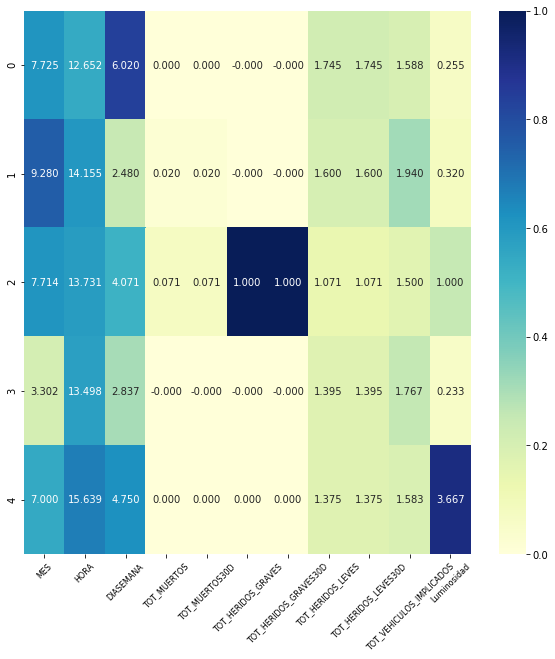

In [16]:
visualize_centroids(centroids, datam, atributos_1)

In [17]:
df

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,MEDIDAS_ESPECIALES,lum_CREPÚSCULO,lum_NOCHE: ILUMINACIÓN INSUFICIENTE,lum_NOCHE: ILUMINACIÓN SUFICIENTE,lum_NOCHE: SIN ILUMINACIÓN,lum_PLENO DÍA,dens_CONGESTIONADA,dens_DENSA,dens_FLUIDA,Luminosidad
13555,8,11.500000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13585,11,14.916667,1,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13621,12,6.000000,6,Almería,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,NINGUNA MEDIDA,0,0,0,1,0,0,0,1,1
13702,12,11.250000,2,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
13852,6,12.000000,5,Almería,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78700,6,14.666667,2,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78709,1,12.000000,1,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78811,3,15.166667,5,Sevilla,Andalucía,NO_ES_ISLA,2,2,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0
78819,12,9.750000,4,Sevilla,Andalucía,NO_ES_ISLA,1,1,0,0.0,...,NINGUNA MEDIDA,0,0,0,0,1,0,0,1,0


In [18]:
from collections import Counter

In [19]:
# centroid instances
Counter(labels)

Counter({2: 14, 1: 50, 0: 51, 3: 43, 4: 24})